____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Autor: Rodrigo Maranzana__\
__Cátedra de Investigación Operativa - Curso I4051 - Turno Miércoles Noche - Docente: Martín Palazzo__
____

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Manipulación-de-datos" data-toc-modified-id="Manipulación-de-datos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Manipulación de datos</a></span></li><li><span><a href="#Ajuste-a-densidad-exponencial" data-toc-modified-id="Ajuste-a-densidad-exponencial-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ajuste a densidad exponencial</a></span><ul class="toc-item"><li><span><a href="#Ajuste-con-librería-de-Scipy" data-toc-modified-id="Ajuste-con-librería-de-Scipy-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Ajuste con librería de Scipy</a></span></li><li><span><a href="#Ajuste-con-solución-analítica" data-toc-modified-id="Ajuste-con-solución-analítica-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Ajuste con solución analítica</a></span></li></ul></li><li><span><a href="#Visualización" data-toc-modified-id="Visualización-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualización</a></span></li></ul></div>

# Ajuste con Máxima Verosimilitud

En este Notebook vamos a trajar con datos de tiempos de llegada de autos en la Autopista Lugones. El objetivo es encontrar el parámetro $\lambda$ óptimo que explica el Ajuste de los datos a una función de densidad Exponencial. Vamos a hacerlo con dos métodos distintos. Verosimilitud Máxima y usando la librería Scipy.

In [42]:
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt

## Manipulación de datos

Importamos los datos y creamos un DataFrame de Pandas con las columnas representando las distintas entradas de la Autopista Lugones: Dorrego, Juramento, Monroe, Udaondo y Esma.
Cada fila de las 500 representa una medición de tiempo de arribo de un vehículo.

In [16]:
df_lugones = pd.read_excel("lugones_arribos.xlsx", index_col=0)  

df_lugones

,Dorrego,Juramento,Monroe,Udaondo,Esma
0,0.000162,0.006540,0.000617,0.001453,0.000011
1,0.001048,0.006992,0.001214,0.001839,0.001837
2,0.001173,0.007424,0.001652,0.001937,0.002194
3,0.001287,0.009399,0.002005,0.001986,0.003150
4,0.001964,0.010459,0.002452,0.002167,0.003342
...,...,...,...,...,...
495,0.318998,0.798637,0.239504,0.225528,0.238434
496,0.319717,0.799335,0.239914,0.225862,0.238591
497,0.320213,0.799927,0.239941,0.226031,0.239606
498,0.320558,0.800879,0.240112,0.226078,0.241055


Dado que el tiempo de DataFrame es acumulado, y que necesitamos el tiempo entre arribos, vamos a restar los valores entre sí usando el método "diff" de Pandas.
El resultado es el data frame "df_lugones_density" que contiene los tiempos entre arribos de cada uno de los 500 vehículos.

In [18]:
df_lugones_density = df_lugones.diff().fillna(df_lugones)

df_lugones_density

,Dorrego,Juramento,Monroe,Udaondo,Esma
0,0.000162,0.006540,0.000617,0.001453,0.000011
1,0.000887,0.000452,0.000598,0.000386,0.001826
2,0.000125,0.000433,0.000437,0.000097,0.000356
3,0.000114,0.001974,0.000354,0.000050,0.000957
4,0.000677,0.001061,0.000447,0.000181,0.000191
...,...,...,...,...,...
495,0.001033,0.002718,0.001028,0.000447,0.000043
496,0.000719,0.000698,0.000409,0.000334,0.000157
497,0.000496,0.000592,0.000027,0.000169,0.001015
498,0.000346,0.000952,0.000171,0.000046,0.001449


A partir de este punto, a modo de ejemplo vamos a trabajar con la entrada Dorrego. Es decir, vamos a calcular el lambda correspondiente a la distribución de interarribos de la entrada Dorrego.

In [26]:
dorrego_values = df_lugones_density["Dorrego"].to_numpy()

## Ajuste a densidad exponencial

### Ajuste con librería de Scipy

Con los datos interarribos, en primer lugar usamos la librería de Scipy para poder ajustar el parámetro lambda. Para lograr esto, necesitamos llamar al método "fit" de la función exponencial "expon".
El input de esta función son los valores de arribos que filtramos en el punto anterior.

In [49]:
_, scale= st.expon.fit(dorrego_values)

lam_sci = 1/scale

print(f"El lambda calculado con el ajuste de la librería Scipy: {lam_sci}")

El lambda calculado con el ajuste de la librería Scipy: 1560.3785201728292


### Ajuste con solución analítica

Sabemos que el resultado de Máxima Verosimilitud para la distribución exponencial es una solución analítica. Por lo tanto podemos calcularlo facilmente.

El valor de lambda óptimo con el método de la máxima verosimilitud se calcula como:

$$ \beta = \sum^n_i{\frac{X_i}{n}} $$
$$ \lambda = \frac{1}{\beta} $$

In [50]:
beta_an = sum(dorrego_values)/len(dorrego_values)

lam_an = 1 / beta

print(f"El lambda calculado con el ajuste de la librería Scipy: {lam_an}")

El lambda calculado con el ajuste de la librería Scipy: 1559.7357687713277


## Visualización

Vamos a plotear un histograma de los datos constrastado con las densidades exponenciales encontradas, tanto de la librería Scipy como la Máxima Verosimilitud Analítica.

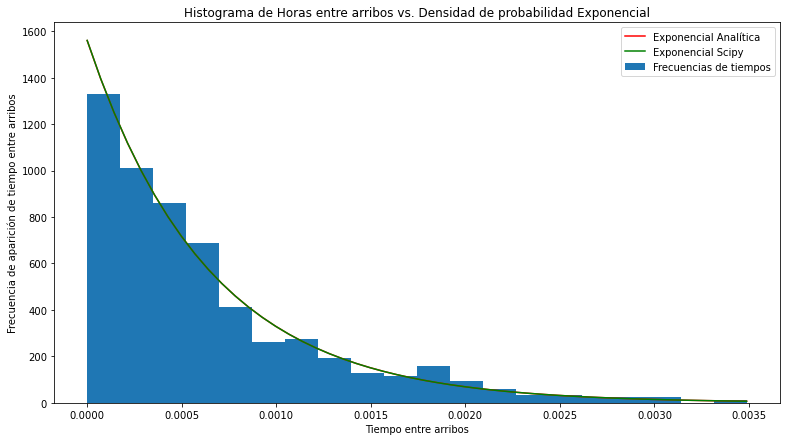

In [71]:
# Creamos una figura:
plt.figure(figsize=(13,7))

# Densidad exponencial teórica:
xvals = np.linspace(0, np.max(dorrego_values))
yvals_a = st.expon.pdf(xvals, scale=1/lam_an)

plt.plot(xvals, yvals_a, c='r', label='Exponencial Analítica')
    
# Densidad exponencial con fit de Scipy:
yvals_s = st.expon.pdf(xvals, scale=1/lam_sci)
plt.plot(xvals, yvals_s, c='g', label='Exponencial Scipy')

# Histograma normalizado de valores de tiempos:
plt.hist(dorrego_values, density=True, bins=20, label='Frecuencias de tiempos')

# Formato de gráfico:
plt.title('Histograma de Horas entre arribos vs. Densidad de probabilidad Exponencial')
plt.ylabel('Frecuencia de aparición de tiempo entre arribos')
plt.xlabel('Tiempo entre arribos')
plt.legend()

# # Zoom
# plt.xlim(0, 2.5e-6)
# plt.ylim(1555, 1565)

# Visualizamos:
plt.show()

Como era de esperar las soluciones tanto de forma analítica como de Scipy coinciden con una variación despreciable